<a href="https://colab.research.google.com/github/ibonetc/DeepLearning_Salud/blob/main/IA_EjemploFiltros_Pulmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import scipy
from scipy import signal
import matplotlib.pyplot as plt

# Filtro para buscar bordes

In [ ]:
!unzip /content/drive/MyDrive/HealthData/imagenes_salud.zip

In [6]:
path='/content/imagenes_salud/normales_dt/IM-0001-0001.jpeg'

In [13]:
img=cv2.imread(path)
img.shape

(1317, 1857, 3)

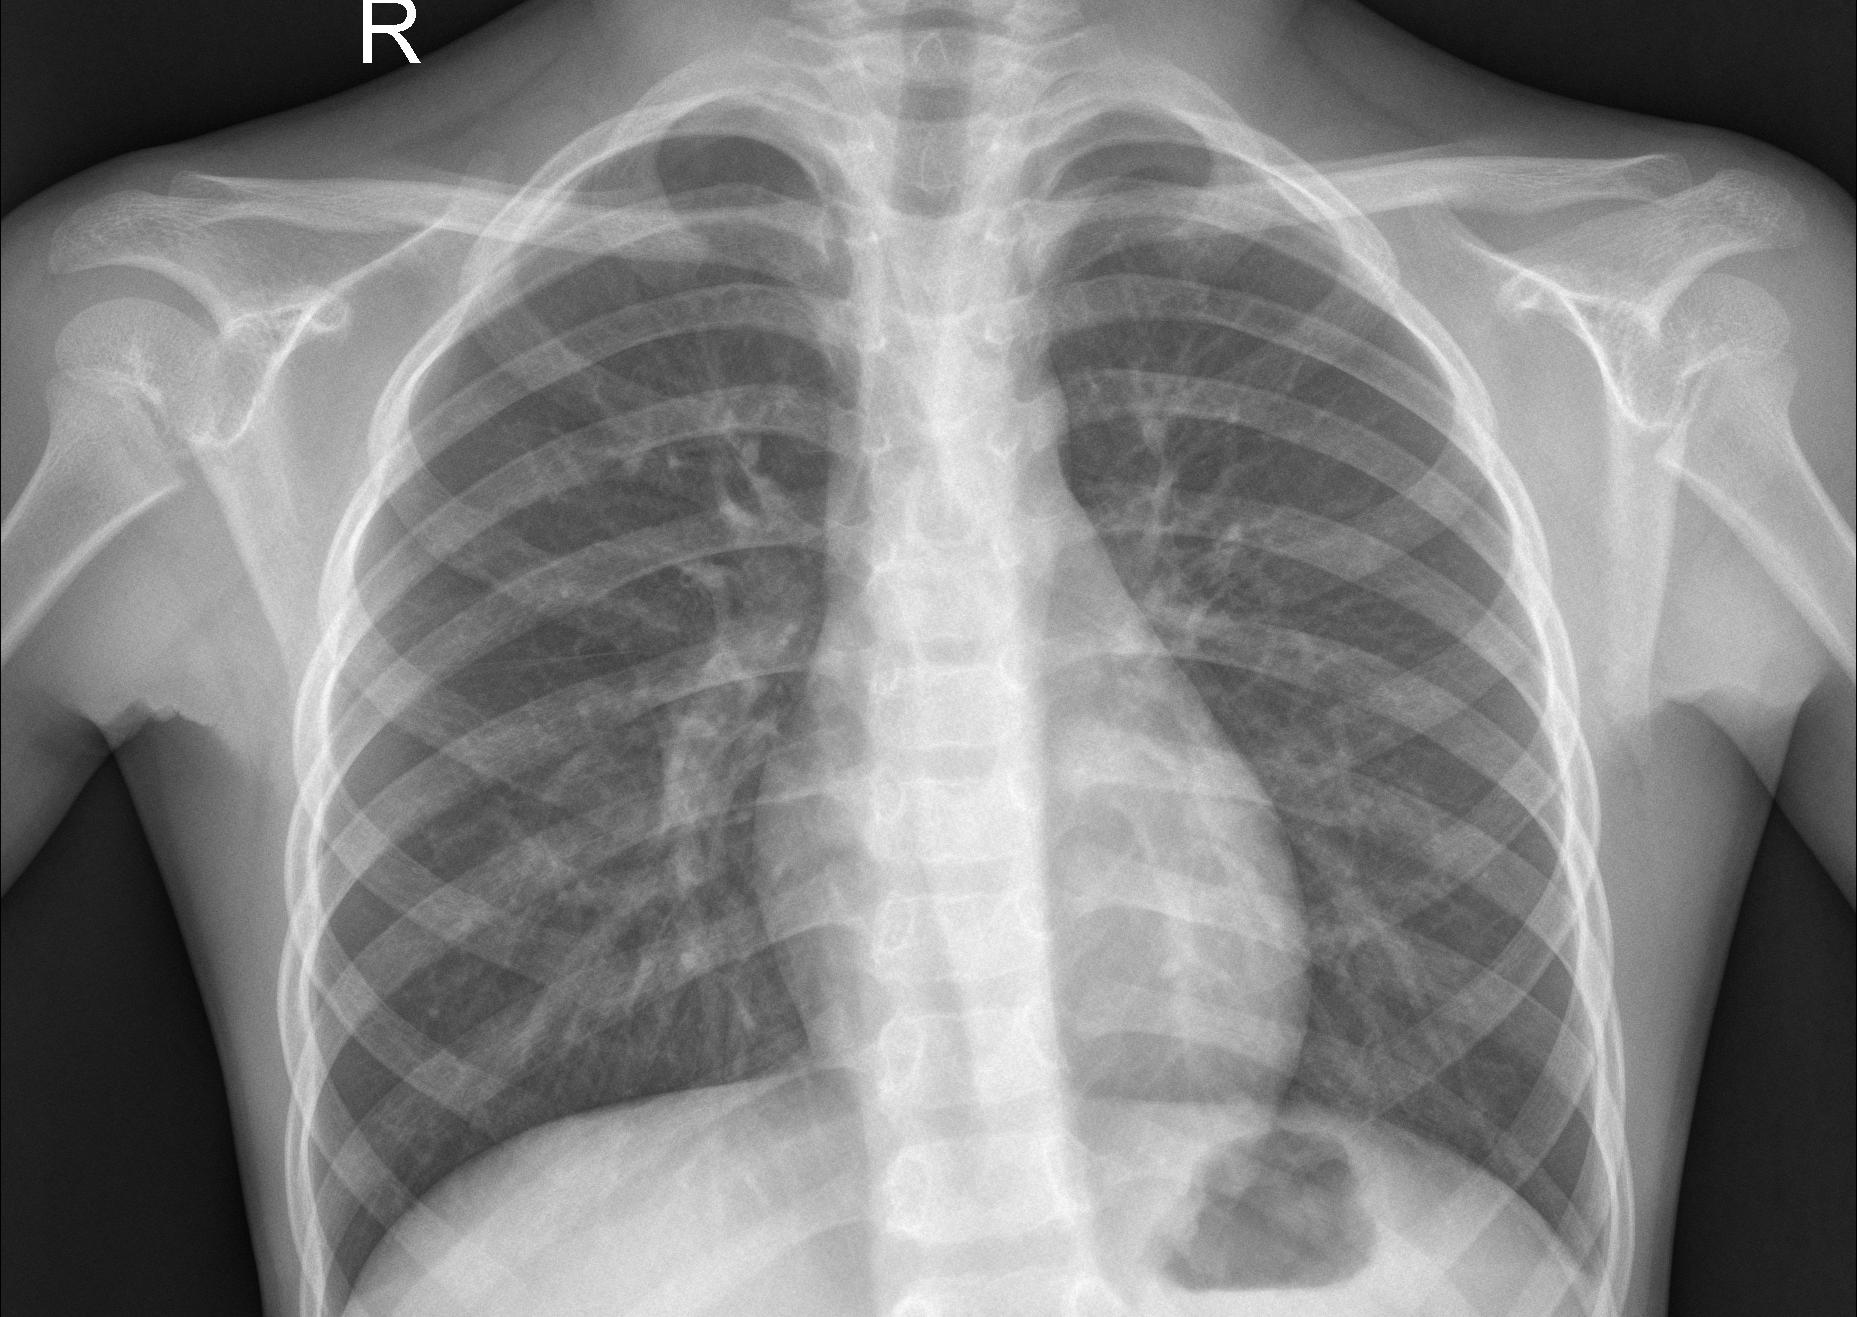

In [14]:
cv2_imshow(img)

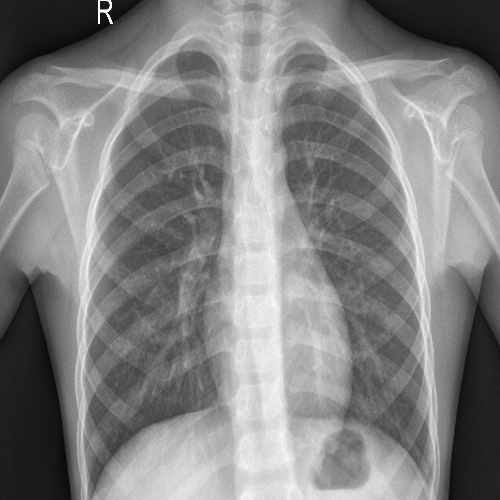

In [19]:
img=cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY) ## Convertir a blanco y negro
imgR=cv2.resize(img,(500,500)) ## Para achicar la imagen un poco
cv2_imshow(imgR)

In [20]:
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [21]:
img

array([[ 0, 32, 33, ..., 33, 34,  0],
       [ 0, 33, 33, ..., 34, 34,  0],
       [ 1, 33, 33, ..., 34, 34,  0],
       ...,
       [ 0, 28, 28, ..., 34, 35,  0],
       [ 0, 29, 28, ..., 34, 35,  0],
       [ 0, 29, 29, ..., 35, 34,  0]], dtype=uint8)

In [22]:
res=signal.convolve2d(imgR, kernel, mode='same', boundary='fill', fillvalue=0)

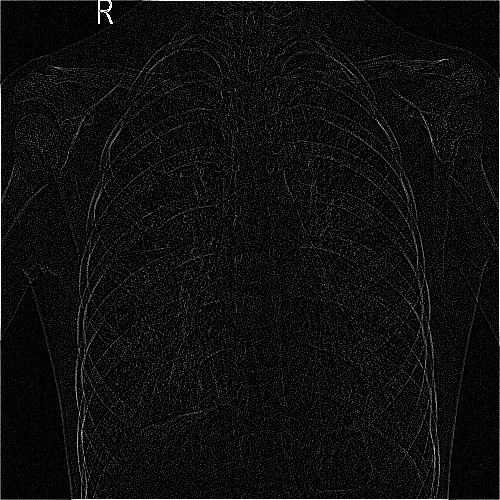

In [23]:
cv2_imshow(res)

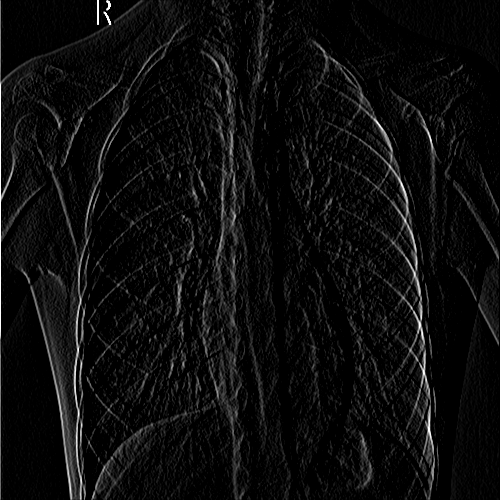

In [24]:
kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
res=signal.convolve2d(imgR, kernel, mode='same', boundary='fill', fillvalue=0)
cv2_imshow(res)

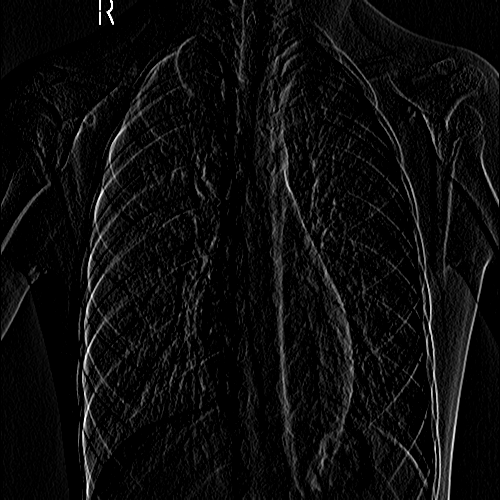

In [25]:
kernel=kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
res=cv2.filter2D(imgR, -1,kernel)
cv2_imshow(res)

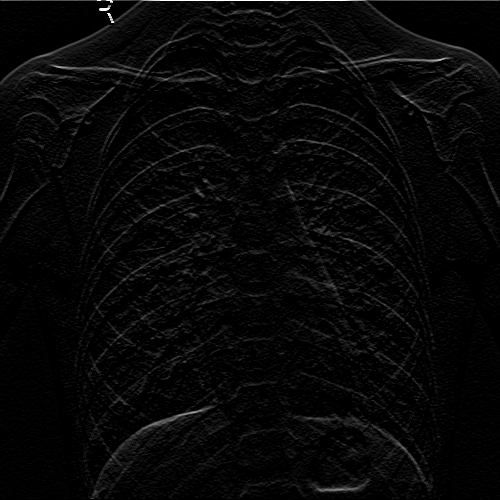

In [26]:
kernel=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
res=signal.convolve2d(imgR, kernel, mode='same', boundary='fill', fillvalue=0)
cv2_imshow(res)

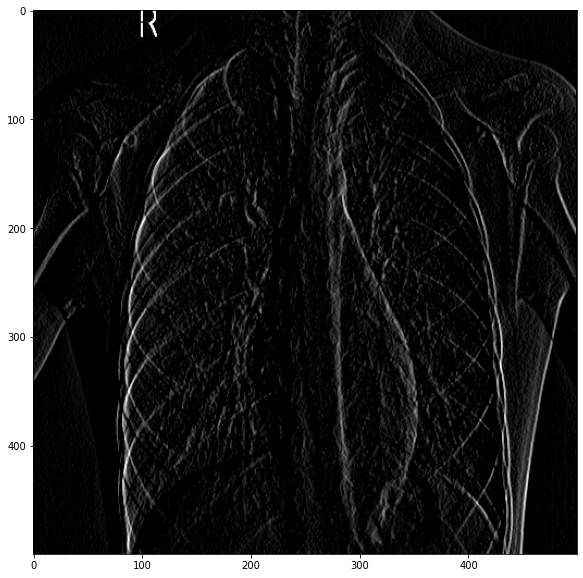

In [28]:
kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
res=cv2.filter2D(imgR, -1,kernel)
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()